<a href="https://colab.research.google.com/github/DDR7707/End-To-End-ML-Projects/blob/main/Car%20Sales%20Basic%20Intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car sales price prediction model 

### Understanding Problem Statement
* Given 4 columns ["Make" , "Colour" , "Odometer (KM)" , "Doors"] . 
* Need to predict Price of the Car from given data . 
* Supervised Learning model , since we have features and their corresponding Labels . 
* Regression problem , since we need to predict the continuous output values.

### Steps for creating model : 
1. Data Loading
2. Performing EDA(Exploratory Data Analysis)
3. Plotting Graphs / Visualization for better understanding of the data.
4. Data Preprocessing
5. Splitting the data to train and test sets.
6. Feature Scaling the data
7. Modeling
8. Hyperparameter tuning for best model
9. Deploying/Saving the model

## Data Loading

### Importing required basic modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
import warnings
warnings.filterwarnings('ignore')

### Importing Data(in .csv format) to Pandas DataFrame

In [2]:
df = pd.read_csv("car-sales-extended-missing-data.csv")
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


## Performing EDA (Exploratory Data Analysis)

### Understanding the columns : 
1. Make : Represents the manufacturing company of the car
2. Colour : Represents the colour of the car
3. Odometer (KM) : Represents the odometer reading in kilometers
4. Doors : Represents the number of doors in the car

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [4]:
df.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


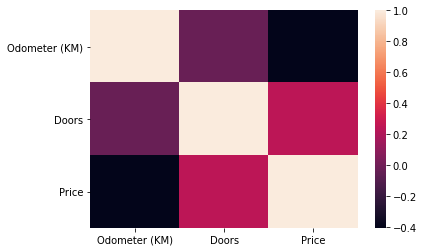

In [5]:
sns.heatmap(df.corr())

In [6]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Dividing into Numerical and Categorical Columns

In [7]:
cats = df.select_dtypes(include="object").columns
cats

Index(['Make', 'Colour'], dtype='object')

In [8]:
ints = df.select_dtypes(exclude="object").columns
ints

Index(['Odometer (KM)', 'Doors', 'Price'], dtype='object')

### Finding Unique and value_counts of each column in Dataframe

In [9]:
for i in cats:
  print(f"The number of unique values in {i} column is/are {len(df[i].unique())}")
  print("\n")
  print(f"The unique values in {i} column is/are {df[i].unique()}")
  print("\n")
  print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
  print("\n\n")
  print("*"*100)
  print("\n\n")

The number of unique values in Make column is/are 5


The unique values in Make column is/are ['Honda' 'BMW' 'Toyota' 'Nissan' nan]


The value counts for each value in Make column is/are :  
Toyota    379
Honda     292
Nissan    183
BMW        97
Name: Make, dtype: int64



****************************************************************************************************



The number of unique values in Colour column is/are 6


The unique values in Colour column is/are ['White' 'Blue' 'Red' 'Green' nan 'Black']


The value counts for each value in Colour column is/are :  
White    390
Blue     302
Black     95
Red       88
Green     75
Name: Colour, dtype: int64



****************************************************************************************************





### Grouping by the columns to find the insights 

In [10]:
for i in df.columns:
  print(f"Group by {i} column in the dataframe is : \n{df.groupby([i]).mean()}")
  print("\n")
  print("*"*100)
  print("\n")

Group by Make column in the dataframe is : 
        Odometer (KM)     Doors         Price
Make                                         
BMW     127491.439560  4.548387  26902.440860
Honda   125233.374101  4.000000  14618.661922
Nissan  136809.029070  3.782857  13664.502857
Toyota  135942.582873  4.000000  15715.257062


****************************************************************************************************


Group by Colour column in the dataframe is : 
        Odometer (KM)     Doors         Price
Colour                                       
Black   132735.744681  4.022472  16348.044944
Blue    135673.448276  3.972028  16216.099315
Green   139443.492958  4.013889  14462.847222
Red     132375.304878  4.098765  15261.666667
White   126049.368852  4.015957  16387.227027


****************************************************************************************************


Group by Odometer (KM) column in the dataframe is : 
               Doors    Price
Odometer (KM)      

## Plotting Graphs / Visualization for better understanding of the data.

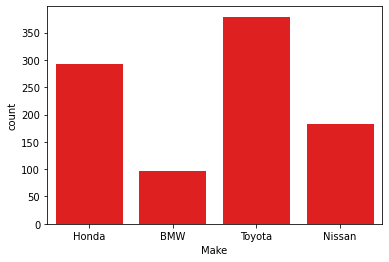

In [11]:
sns.countplot(df["Make"] , color = "red");

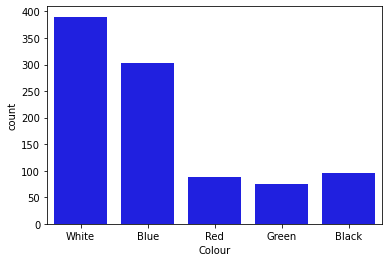

In [12]:
sns.countplot(df['Colour'], color='blue');

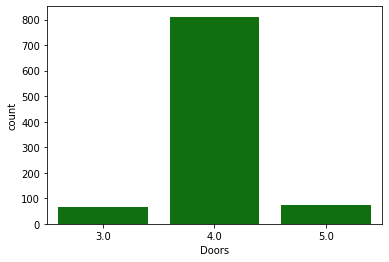

In [13]:
sns.countplot(df["Doors"] , color = "green");

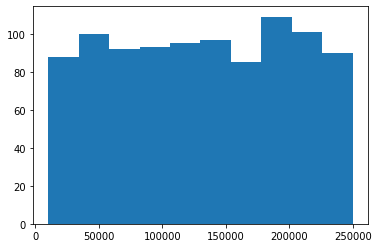

In [14]:
plt.hist(df["Odometer (KM)"] , bins=10);

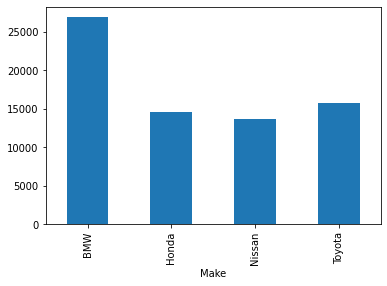

In [15]:
df["Price"].groupby(df["Make"]).mean().plot(x = "Make" , y = "Price" , kind = "bar");

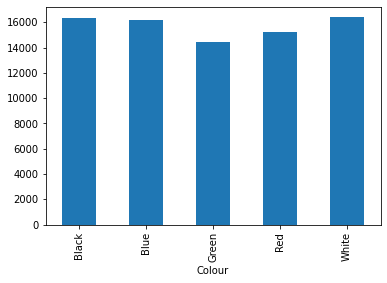

In [16]:
df["Price"].groupby(df["Colour"]).mean().plot(x = "Make" , y = "Price" , kind = "bar");

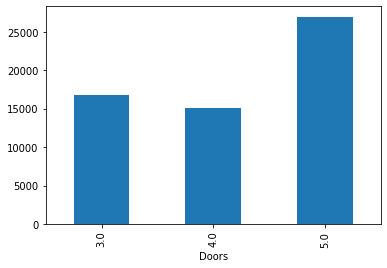

In [17]:
df["Price"].groupby(df["Doors"]).mean().plot(x = "Make" , y = "Price" , kind = "bar");

## Data Preprocessing

### Finding missing values in Dataframe

In [18]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Filling Categorical missing values with `Mode` of the data.

In [19]:
df["Make"].mode()

0    Toyota
dtype: object

In [20]:
df["Make"].fillna(df["Make"].mode()[0] , inplace = True)
df["Make"].isna().sum()

0

In [21]:
df["Colour"].fillna(df["Colour"].mode()[0] , inplace = True)
df["Colour"].isna().sum()

0

In [22]:
df["Doors"].fillna(df["Doors"].mode()[0] , inplace = True)
df["Doors"].isna().sum()

0

### Filling Numerical columns with the `Median` of the data.

In [23]:
df["Odometer (KM)"].fillna(df["Odometer (KM)"].median() , inplace = True)

### Checking for any missing values after imputation

In [24]:
df.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

### Dropping the rows with missing values in Labels , as filling labels will effect the model performance.

In [25]:
df.dropna(subset=["Price"] , axis = 0 , inplace = True)

In [26]:
len(df)

950

### Onehot encodiing / Creating Dummies for the categorical data.

In [27]:
df = pd.get_dummies(df , columns = ["Make" , "Colour" , "Doors"] , prefix = ["Make" , "Colour" , "Doors"])

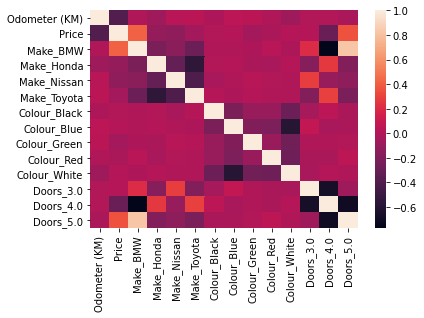

In [28]:
sns.heatmap(df.corr())

### Droping each of one class to eliminate multicorrelation.

In [29]:
df.drop(["Make_Nissan" , "Colour_Green" , "Doors_3.0"] , axis = 1 , inplace = True)

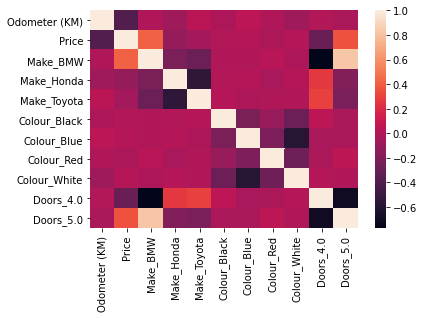

In [30]:
sns.heatmap(df.corr())

### Final data analysis before splitting into train and test sets

In [31]:
df.head()

,Odometer (KM),Price,Make_BMW,Make_Honda,Make_Toyota,Colour_Black,Colour_Blue,Colour_Red,Colour_White,Doors_4.0,Doors_5.0
0,35431.0,15323.0,0,1,0,0,0,0,1,1,0
1,192714.0,19943.0,1,0,0,0,1,0,0,0,1
2,84714.0,28343.0,0,1,0,0,0,0,1,1,0
3,154365.0,13434.0,0,0,1,0,0,0,1,1,0
4,181577.0,14043.0,0,0,0,0,1,0,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Odometer (KM)  950 non-null    float64
 1   Price          950 non-null    float64
 2   Make_BMW       950 non-null    uint8  
 3   Make_Honda     950 non-null    uint8  
 4   Make_Toyota    950 non-null    uint8  
 5   Colour_Black   950 non-null    uint8  
 6   Colour_Blue    950 non-null    uint8  
 7   Colour_Red     950 non-null    uint8  
 8   Colour_White   950 non-null    uint8  
 9   Doors_4.0      950 non-null    uint8  
 10  Doors_5.0      950 non-null    uint8  
dtypes: float64(2), uint8(9)
memory usage: 30.6 KB


In [33]:
df.isna().sum()

Odometer (KM)    0
Price            0
Make_BMW         0
Make_Honda       0
Make_Toyota      0
Colour_Black     0
Colour_Blue      0
Colour_Red       0
Colour_White     0
Doors_4.0        0
Doors_5.0        0
dtype: int64

### Dividing Features and Labels

In [34]:
X = df.drop(["Price"] , axis = 1)
y = df["Price"]

In [35]:
X

,Odometer (KM),Make_BMW,Make_Honda,Make_Toyota,Colour_Black,Colour_Blue,Colour_Red,Colour_White,Doors_4.0,Doors_5.0
0,35431.0,0,1,0,0,0,0,1,1,0
1,192714.0,1,0,0,0,1,0,0,0,1
2,84714.0,0,1,0,0,0,0,1,1,0
3,154365.0,0,0,1,0,0,0,1,1,0
4,181577.0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,35820.0,0,0,1,1,0,0,0,1,0
996,155144.0,0,0,1,0,0,0,1,0,0
997,66604.0,0,0,0,0,1,0,0,1,0
998,215883.0,0,1,0,0,0,0,1,1,0


In [36]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

## Splitting the data to train and test sets.

In [37]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(855, 95, 855, 95)

## Feature Scaling the data.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[["Odometer (KM)"]])
X_train[["Odometer (KM)"]] = scaler.transform(X_train[["Odometer (KM)"]])
X_test[["Odometer (KM)"]] = scaler.transform(X_test[["Odometer (KM)"]])

In [39]:
X_train

,Odometer (KM),Make_BMW,Make_Honda,Make_Toyota,Colour_Black,Colour_Blue,Colour_Red,Colour_White,Doors_4.0,Doors_5.0
934,1.327670,0,1,0,0,0,0,1,1,0
72,0.015264,0,1,0,0,0,0,1,1,0
564,0.872541,0,0,0,0,1,0,0,1,0
44,1.241854,0,0,1,0,1,0,0,1,0
995,-1.419498,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
106,1.315235,0,0,1,0,0,0,1,1,0
277,1.713139,1,0,0,0,1,0,0,0,1
904,0.977800,0,0,1,0,0,0,1,1,0
450,0.034633,0,1,0,0,1,0,0,1,0


In [40]:
X_test

,Odometer (KM),Make_BMW,Make_Honda,Make_Toyota,Colour_Black,Colour_Blue,Colour_Red,Colour_White,Doors_4.0,Doors_5.0
203,-0.463882,0,0,1,0,1,0,0,1,0
979,-1.686197,0,0,1,1,0,0,0,1,0
729,0.999307,0,1,0,0,1,0,0,1,0
838,1.566107,0,0,0,0,0,0,0,1,0
919,1.507372,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
847,0.015264,0,1,0,0,0,0,0,1,0
552,1.249506,0,1,0,0,0,0,1,1,0
533,1.358905,0,0,1,0,0,0,0,1,0
354,0.986917,0,1,0,0,1,0,0,1,0


In [41]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components = 2)
# X_train = lda.fit_transform(X_train , y_train)
# X_test = lda.transform(X_test)

## Model fitting

### Linear Regressor
[Documnetation](https://http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [42]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()   
linear.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Getting score on Train set

In [43]:
linear.score(X_train , y_train)

0.35306486919967217

#### Getting score on Test set

In [44]:
linear.score(X_test , y_test)

0.08524268218022157

#### Getting predictions of linear model on test data

In [45]:
linear_preds = linear.predict(X_test)
linear_preds

array([18116.56272045, 21957.46837554, 11182.11835409,  7461.50082462,
        9055.08527322, 10496.14086606, 15296.67417443, 14881.27716171,
       20151.95108394, 14207.75365942,  6772.37393904, 17144.2196176 ,
       11356.58257342, 13630.94827351, 13905.07349147, 16018.47254756,
       15349.10013757,  9930.78175381, 11473.39125052, 11287.07370224,
       10085.86254764, 13713.86950679, 17474.20816722, 23662.13734493,
       12377.89934938, 15084.39684195, 19157.47091796, 14023.82506791,
       20531.78664025, 20139.27924354, 18088.42668533, 21743.26498495,
       12947.97654961, 14175.92990779, 18087.51672236, 19737.92843489,
       11787.80855579, 12632.15343377, 18415.24022175, 10855.61612318,
       15307.49863729, 16734.01284308, 18853.03855551, 17275.9943918 ,
       15098.32688901, 14008.06052384, 11723.42052963,  8735.40280339,
       15178.52275964, 18771.97398717, 11449.26059353, 21719.82022675,
       19280.53027854,  9152.21713041, 17543.8373003 , 15762.13071332,
      

#### Visualizing the y_true and linear_preds

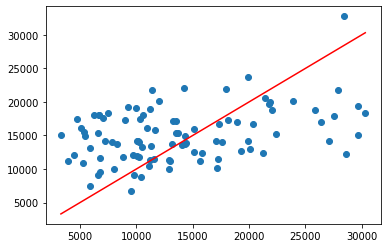

In [46]:
plt.scatter(y_test , linear_preds)
x = np.linspace(min(y_test),max(y_test),100)
y = x
plt.plot(x, y , "-r");

#### `Mean squared log error` evaluation metrics of linear model on test set

In [47]:
linear_score = sklearn.metrics.mean_squared_log_error(y_test , linear_preds)
linear_score

0.2813850892448644

### Random Forest Regressor 
[Documentation](https://https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [48]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(random_state = 42)
random.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### Getting score on Train set

In [49]:
random.score(X_train , y_train)

0.877741126922778

#### Getting score on Test set

In [50]:
random.score(X_test , y_test)

0.027663472077119278

#### Getting predictions of Randomforest model on test data

In [51]:
random_preds = random.predict(X_test)
random_preds

array([17141.96      , 20767.04      , 11993.16      ,  9833.39      ,
       11286.99      , 11425.3       , 11755.22      , 10976.62      ,
       14794.39      , 16210.40350482,  8032.21      , 12367.81      ,
        7964.61      , 10811.86      , 13754.29      , 19550.14      ,
       17233.44      ,  6555.66      , 10823.1       , 11886.83      ,
       11718.        , 17797.86875397, 18798.51      , 25749.4       ,
        9901.04733333, 23783.03      , 12182.98      ,  7531.76      ,
       19689.2       , 17032.18      , 12520.44      , 13531.17      ,
       11185.18      , 10923.68696429, 28466.19      , 15787.15      ,
       11628.47      , 12307.07      , 15100.75      ,  8156.18      ,
       11976.02      , 19300.04      , 24148.88      , 18343.72      ,
       14319.49388095, 12090.08      , 15076.93      ,  8164.23      ,
       16013.82      , 14041.48      , 11025.18      , 21085.63      ,
       15659.17      ,  6210.47      , 12320.11      , 11847.04      ,
      

#### Visualizing the y_true and random_preds

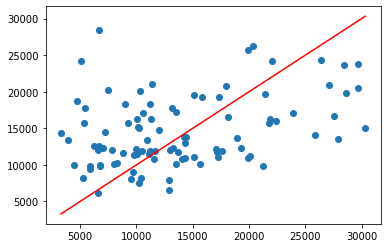

In [52]:
plt.scatter(y_test , random_preds)
x = np.linspace(min(y_test),max(y_test),100)
y = x
plt.plot(x, y , "-r");

#### `Mean squared log error` evaluation metrics of randomforest model on test set

In [53]:
random_score = sklearn.metrics.mean_squared_log_error(y_test , random_preds)
random_score

0.2857286609379145

### XGBRegressor

In [54]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train , y_train)

[17:34:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

#### Getting score on Train set

In [55]:
xgb.score(X_train , y_train)

0.552983029513166

#### Getting score on Test set

In [56]:
xgb.score(X_test , y_test)

0.164183330489848

#### Getting predictions of XGBRegressor model on test data

In [57]:
xgb_preds = xgb.predict(X_test)
xgb_preds

array([19313.316 , 19169.156 , 11791.149 , 10533.552 , 10139.213 ,
       10839.619 , 14648.756 , 11658.7   , 13089.177 , 14872.099 ,
        8144.312 , 16725.432 , 11444.634 , 11658.7   , 12289.28  ,
       15397.421 , 15560.778 , 10753.182 , 11479.497 , 11058.767 ,
       11618.56  , 14493.236 , 14696.923 , 23415.332 , 14253.352 ,
       19225.068 , 15946.15  , 12016.584 , 19907.05  , 19372.438 ,
       19100.6   , 17812.773 , 12193.0205, 15576.27  , 26536.615 ,
       19372.438 , 11444.634 , 11575.757 , 20421.492 ,  9385.92  ,
       14648.756 , 17390.605 , 20469.66  , 18702.85  , 14541.403 ,
       12289.28  , 10753.182 , 10033.391 , 15396.092 , 19116.041 ,
       11444.634 , 16487.467 , 19580.492 ,  7850.714 , 16449.453 ,
       13937.112 , 15396.092 , 11176.934 , 14300.779 , 12193.0205,
       11396.541 , 15955.132 , 11658.7   , 16959.744 , 19273.236 ,
       19580.492 , 11602.602 , 20009.902 , 19212.818 , 20330.428 ,
       13572.307 , 20266.527 , 18345.023 , 15444.259 , 13399.5

#### Visualizing the y_true and xgb_preds

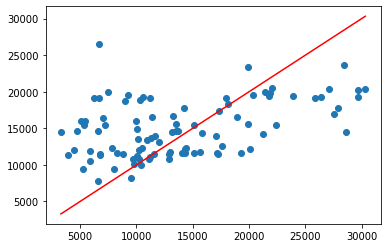

In [58]:
plt.scatter(y_test , xgb_preds)
x = np.linspace(min(y_test),max(y_test),100)
y = x
plt.plot(x, y , "-r");

#### `Mean squared log error` evaluation metrics of XGBRegressor model on test set

In [59]:
xgb_score = sklearn.metrics.mean_squared_log_error(y_test , xgb_preds)
xgb_score

0.2645062674517836

## Training with Artificial Neural Networks (ANN)

### Importing modules for ANN model training

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [61]:
# Checking tensorflow version
tf.__version__

'2.4.1'

### Building the model
1. Creating Instance of Sequential architecture
2. Adding Dense layers
3. Compiling the model with optimizers , evaluation metrics , loss functions etc
4. Training and evaluating the model

### Preprocessing data into matrixs as ANN only deals with matrix but not with Dataframes

In [62]:
X_train = X_train[X_train.columns].values
y_train = y_train.ravel()

In [63]:
X_train

array([[1.32766966, 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.01526417, 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.87254081, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.97780047, 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.03463327, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.29565271, 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [64]:
y_train

array([12216.,  5648., 18834.,  5743., 32042., 15652.,  8870.,  7076.,
       29959., 48239.,  4896., 18198., 12353., 29004.,  6200., 31392.,
       13722.,  3944.,  3893., 23840., 19271.,  4358., 25104., 19357.,
       16892., 24668., 18524., 24494.,  5922., 19052., 30374.,  8380.,
        9648.,  5008., 17795., 22542., 16001., 31206., 25763.,  6391.,
       12609., 13147., 10380., 29551.,  9155., 10494., 13932., 18139.,
       19408., 22587., 10580., 14795.,  6029.,  6917., 17036., 13934.,
       10316., 33463., 12402., 16320., 14282., 23868.,  6502., 10456.,
       17105., 18919., 26813., 25775., 23280.,  5260., 18396., 20490.,
        7874., 14613.,  5933., 19545., 12901., 14198., 13546., 10429.,
       16774.,  9928., 29363., 22784., 14331.,  7425., 13707., 48419.,
       31666., 11140., 10377.,  9780.,  6866., 16705., 18375., 26882.,
        7042., 29145., 17866.,  4747., 18484., 21653., 16016., 13199.,
       14204., 28830., 13070., 23902., 28343., 13250., 11036., 23747.,
      

In [65]:
# Creating the sequential instance
ann = Sequential()

# Creating 1st hidden layer
ann.add(Dense(20 , activation = "relu"))

# Creating 2nd hidden layer
ann.add(Dense(20 , activation = "relu"))

# Creating 3rd hidden layer
ann.add(Dense(10 , activation = "relu"))

# Creating output layer
ann.add(Dense(1 , activation = "linear"))

In [66]:
# Compling the model
ann.compile(optimizer = "adam" , loss = "mean_squared_error" , metrics = "mean_squared_logarithmic_error")

### Fitting and Training the model and storing the metrics in variable

In [67]:
# Fitting and Training the model
tf.random.set_seed(42)
h = ann.fit(X_train , y_train , validation_split = 0.1 , epochs = 150 , shuffle = True)

Epoch 1/150
25/25 [==============================] - 2s 24ms/step - loss: 340572142.7692 - mean_squared_logarithmic_error: 89.6994 - val_loss: 380329408.0000 - val_mean_squared_logarithmic_error: 86.8935
Epoch 2/150
25/25 [==============================] - 0s 4ms/step - loss: 343935005.5385 - mean_squared_logarithmic_error: 83.6405 - val_loss: 380299424.0000 - val_mean_squared_logarithmic_error: 78.7882
Epoch 3/150
25/25 [==============================] - 0s 4ms/step - loss: 356717427.6923 - mean_squared_logarithmic_error: 75.5919 - val_loss: 380230592.0000 - val_mean_squared_logarithmic_error: 68.4750
Epoch 4/150
25/25 [==============================] - 0s 4ms/step - loss: 344694462.7692 - mean_squared_logarithmic_error: 64.7683 - val_loss: 380086304.0000 - val_mean_squared_logarithmic_error: 57.8218
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 333830611.6923 - mean_squared_logarithmic_error: 54.2508 - val_loss: 379794016.0000 - val_mean_squared_logarithmic

### Plotting the Evaluation metrics and Loss function trends.

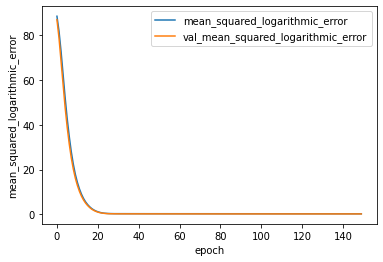

In [68]:
plt.plot(h.history['mean_squared_logarithmic_error'])
plt.plot(h.history["val_mean_squared_logarithmic_error"])
plt.legend(['mean_squared_logarithmic_error' , "val_mean_squared_logarithmic_error"])
plt.xlabel('epoch')
plt.ylabel('mean_squared_logarithmic_error')
plt.show()

Text(0, 0.5, 'loss')

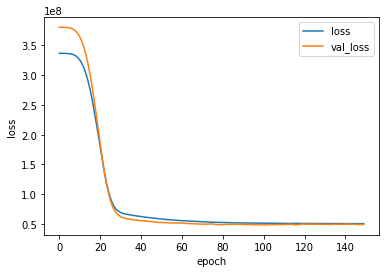

In [69]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(["loss" , "val_loss"])
plt.xlabel('epoch')
plt.ylabel("loss")

### Evaluating the ANN model on the test set

In [70]:
ann_preds = ann.predict(X_test).ravel()
ann_preds

array([18664.947 , 22186.666 , 11724.223 ,  3898.7156,  9447.365 ,
       11260.776 , 12877.449 , 15107.452 , 18862.646 , 14249.9795,
        4391.9907, 14469.504 , 12096.801 , 14066.473 , 14572.97  ,
       16626.395 , 15562.    ,  7663.8325, 11593.212 , 11819.076 ,
        8767.187 , 12781.132 , 18040.82  , 24616.848 ,  9838.442 ,
       11305.289 , 19233.102 , 14274.332 , 19231.701 , 19264.354 ,
       18020.525 , 21774.71  , 13229.014 , 11788.511 , 18426.54  ,
       20037.24  , 12515.788 , 11970.264 , 18744.957 , 11610.05  ,
       12887.968 , 16907.611 , 19380.521 , 16068.302 , 14366.452 ,
       14673.035 , 12039.208 ,  9136.755 , 14030.352 , 19098.693 ,
       12186.849 , 22165.951 , 18015.953 ,  8378.895 , 17694.453 ,
       15963.309 , 13167.217 , 11024.546 , 10986.534 , 13996.225 ,
       11501.324 , 16287.49  , 14191.328 , 18206.932 , 17380.773 ,
       13998.079 , 12982.641 , 18835.125 , 17756.027 , 11642.057 ,
       14442.828 , 19958.822 , 16283.34  , 14752.338 , 15396.3

### Visualizing the y_true and ann_preds

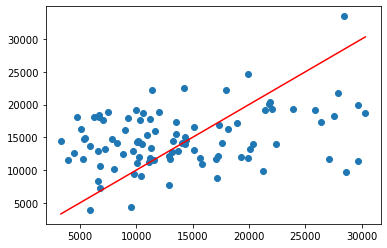

In [71]:
plt.scatter(y_test , ann_preds)
x = np.linspace(min(y_test),max(y_test),100)
y = x
plt.plot(x, y , "-r");

### `Mean squared log error` evaluation metrics of XGBRegressor model on test set

In [72]:
ann_score = sklearn.metrics.mean_squared_log_error(y_test , ann_preds)
ann_score

0.3065449541826091

### Comparing the scores of all three models

In [73]:
scores_data = {"Model" : ["Linear" , "Randomforest" , "XGB" , "ANN"] ,
               "Score" : [linear_score , random_score , xgb_score , ann_score]}

scores_df = pd.DataFrame(data = scores_data)
scores_df

,Model,Score
0,Linear,0.281385
1,Randomforest,0.285729
2,XGB,0.264506
3,ANN,0.306545


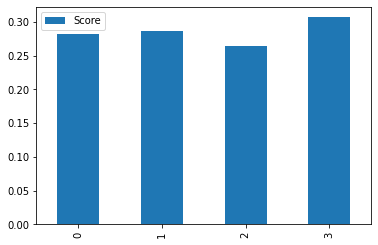

In [74]:
scores_df.plot(kind = "bar");

## Hyperparameter tuning with `GridsearchCV`
[GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [75]:
from sklearn.model_selection import GridSearchCV

random_grid = {"n_estimators": [100, 150 , 200 , 250 , 300 , 350 , 400 , 500 , 600 , 650 , 700] , 
               "max_depth": [None] , 
               "max_features": ["auto", "sqrt"] , 
               "min_samples_split": [2] , 
               }

random_gridsearch = GridSearchCV(estimator = random , param_grid = random_grid , cv=5 , verbose=2 , n_jobs = -1 , scoring = "neg_mean_squared_log_error")
random_gridsearch.fit(X_train , y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [76]:
random_gridsearch.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 500}

In [77]:
final = RandomForestRegressor(n_estimators = 600 , max_features="auto" , min_samples_split=2 , max_depth=None , random_state = 4)
final.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=4, verbose=0, warm_start=False)

In [78]:
final.score(X_train , y_train)

0.879882206638655

In [79]:
final.score(X_test , y_test)

0.03050498922167211

In [80]:
final_preds = final.predict(X_test)
final_preds

array([17401.44333333, 20522.01333333, 12378.655     , 10046.05833333,
       11221.02166667, 11489.435     , 11873.56833333, 10625.18833333,
       15490.21      , 16303.85237526,  8310.38333333, 12615.75333333,
        8068.20666667, 10104.475     , 14360.28166667, 19098.2       ,
       16079.90666667,  7015.855     , 10557.17833333, 12178.14666667,
       12742.65833333, 17731.50674321, 18559.16666667, 25862.12333333,
        9640.48528908, 23608.99333333, 11925.33666667,  7615.20666667,
       19582.14      , 17402.07      , 12621.55      , 15372.30333333,
       10858.65333333, 10885.46477146, 28677.545     , 16205.08333333,
       11526.21333333, 12794.16166667, 15089.79333333,  8280.99      ,
       11889.945     , 18978.835     , 24021.11      , 18502.40333333,
       14346.09228042, 12655.70166667, 14736.66166667,  8225.075     ,
       17210.775     , 14084.5       , 11144.81833333, 19266.21666667,
       16313.53333333,  6014.065     , 11533.5       , 11158.41805556,
      

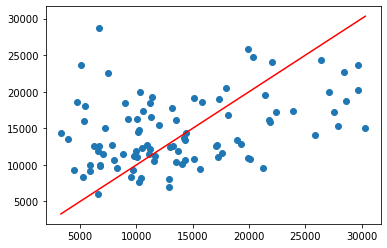

In [81]:
plt.scatter(y_test , final_preds)
x = np.linspace(min(y_test),max(y_test),100)
y = x
plt.plot(x, y , "-r");

In [82]:
final_score = sklearn.metrics.mean_squared_log_error(y_test , final_preds)
final_score

0.2848320012949365

## Saving the model with pickel module

### Since out of all the model we choose XGB as it has less error

In [83]:
import pickle

pickle.dump(xgb, open("xgb_1.pkl", "wb"))

### Loading the model

In [84]:
loaded_pickle_model = pickle.load(open("xgb_1.pkl", "rb"))

[17:36:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
